# *Diabetes Prediction Challenge | Binary Classification*

![](http://www.kaggle.com/competitions/91723/images/header)

## 📊 Veri Seti Değişken Açıklamaları

Bu veri seti, bireylerin demografik bilgileri, yaşam tarzı alışkanlıkları, sağlık göstergeleri ve diyabet tanı durumlarını içermektedir.

### 🔢 Kimlik ve Demografik Bilgiler
- **id**: Her birey için benzersiz kimlik numarası  
- **age**: Bireyin yaşı  
- **gender**: Cinsiyet (Female / Male)  
- **ethnicity**: Etnik köken (White, Hispanic vb.)  
- **education_level**: Eğitim seviyesi (Highschool, Bachelor vb.)  
- **income_level**: Gelir düzeyi (Lower-Middle, Upper-Middle vb.)  
- **employment_status**: Çalışma durumu (Employed, Unemployed vb.)

### 🥗 Yaşam Tarzı ve Günlük Alışkanlıklar
- **alcohol_consumption_per_week**: Haftalık alkol tüketim miktarı  
- **physical_activity_minutes_per_week**: Haftalık fiziksel aktivite süresi (dakika)  
- **diet_score**: Beslenme kalitesi puanı  
- **sleep_hours_per_day**: Günlük uyku süresi (saat)  
- **screen_time_hours_per_day**: Günlük ekran başında geçirilen süre (saat)  
- **smoking_status**: Sigara kullanımı durumu (Never, Current, Former)

### ⚕️ Fiziksel Ölçümler
- **bmi**: Vücut Kitle İndeksi (Body Mass Index)  
- **waist_to_hip_ratio**: Bel / kalça oranı  
- **heart_rate**: Dinlenme halindeki kalp atış hızı  

### 🩺 Kan Basıncı ve Kardiyovasküler Göstergeler
- **systolic_bp**: Sistolik kan basıncı  
- **diastolic_bp**: Diyastolik kan basıncı  

### 🧪 Kan Değerleri (Lipid Profili)
- **cholesterol_total**: Toplam kolesterol seviyesi  
- **hdl_cholesterol**: HDL (iyi) kolesterol seviyesi  
- **ldl_cholesterol**: LDL (kötü) kolesterol seviyesi  
- **triglycerides**: Trigliserid seviyesi  

### 🧬 Sağlık Geçmişi
- **family_history_diabetes**: Ailede diyabet öyküsü (0: Yok, 1: Var)  
- **hypertension_history**: Hipertansiyon geçmişi (0: Yok, 1: Var)  
- **cardiovascular_history**: Kardiyovasküler hastalık geçmişi (0: Yok, 1: Var)

### 🎯 Hedef Değişken
- **diagnosed_diabetes**: Diyabet tanısı durumu  
  - `0`: Diyabet yok  
  - `1`: Diyabet var

## *İmport*

In [32]:
import pandas as pd
# pandas: veri işleme ve analiz kütüphanesi

from tensorflow.keras.models import Sequential
# Sequential: katmanları sırayla ekleyerek model kurmamızı sağlar

from tensorflow.keras.layers import Dense
# Dense: tam bağlantılı (fully connected) yapay sinir ağı katmanı

from sklearn.preprocessing import StandardScaler
# Verileri ölçeklemek (standartlaştırmak) için kullanılan sınıf

import warnings
warnings.filterwarnings('ignore')

# warnings kütüphanesi, çalışma sırasında çıkan uyarı mesajlarını kontrol eder.
# Bu satır uyarı mesajlarını gizleyerek çıktının temiz görünmesini sağlar.

import matplotlib.pyplot as plt
import seaborn as sns 

# matplotlib.pyplot ve seaborn kütüphaneleri veri görselleştirme için kullanılır.
# plt temel grafik çizimlerinde, sns ise daha gelişmiş ve estetik grafiklerde tercih edilir.

## *Read Data*

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s5e12/sample_submission.csv
/kaggle/input/playground-series-s5e12/train.csv
/kaggle/input/playground-series-s5e12/test.csv


In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s5e12/train.csv')

# '/kaggle/input/playground-series-s5e12/train.csv' adlı CSV dosyasını okur ve veriyi bir pandas DataFrame'i olarak 'df' değişkenine yükler.

## *Exploratory Data Analysis*

In [4]:
df.head()
# Veri setinin ilk 5 satırını görüntüler.
# Bu, veri yapısını ve sütunları genel olarak incelemek için kullanılır.

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [5]:
df.sample()
# Veri setinden rastgele bir satır (veya satırlar) getirir.
# Veri kontrolü ve genel görünüm hakkında fikir edinmek için yararlıdır.

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
457202,457202,56,3,88,7.2,6.8,3.8,23.5,0.84,129,...,Male,Black,Highschool,Lower-Middle,Never,Employed,0,1,0,1.0


In [6]:
df.isnull().sum()
# Her sütunda kaç adet eksik (NaN) değer bulunduğunu gösterir.
# Eksik veri analizi yapmak için kullanılır.

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


In [7]:
df.shape
# Veri setinin boyutlarını (satır, sütun) bir demet (tuple) olarak döndürür.
# Örneğin (1470, 35) gibi bir çıktı verir.

(700000, 26)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [9]:
df.columns
# DataFrame’deki sütun isimlerini listeler

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')

## *Data Visualization*

In [10]:
# Seaborn grafik stili
sns.set(style="whitegrid")

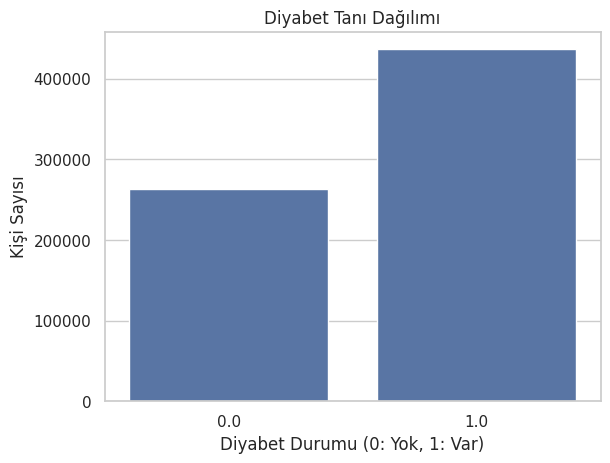

In [11]:
# Diyabet tanısı olan ve olmayan bireylerin dağılımını görselleştirme
sns.countplot(x="diagnosed_diabetes", data=df)

plt.title("Diyabet Tanı Dağılımı")
plt.xlabel("Diyabet Durumu (0: Yok, 1: Var)")
plt.ylabel("Kişi Sayısı")

plt.show()

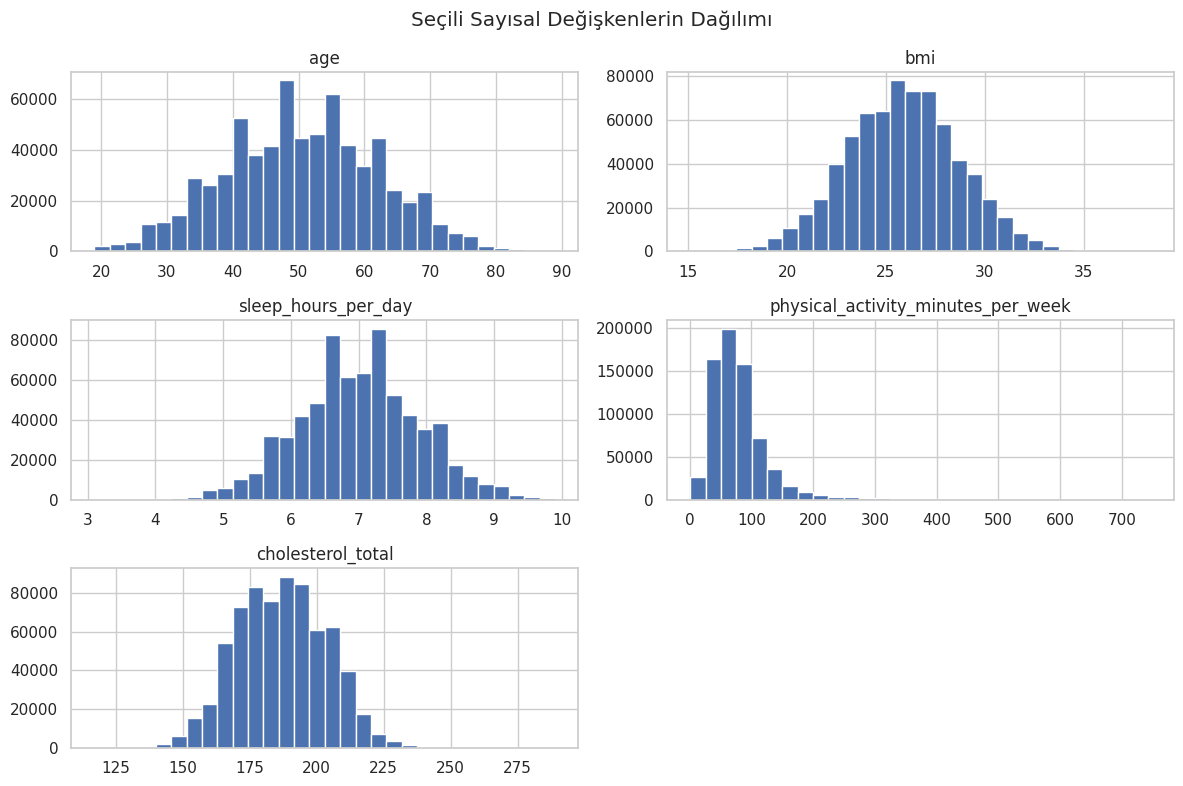

In [12]:
# İncelenecek temel sayısal değişkenler
num_cols = [
    "age",
    "bmi",
    "sleep_hours_per_day",
    "physical_activity_minutes_per_week",
    "cholesterol_total"
]

# Histogramlar ile dağılımların incelenmesi
df[num_cols].hist(bins=30, figsize=(12,8))

plt.suptitle("Seçili Sayısal Değişkenlerin Dağılımı")
plt.tight_layout()
plt.show()

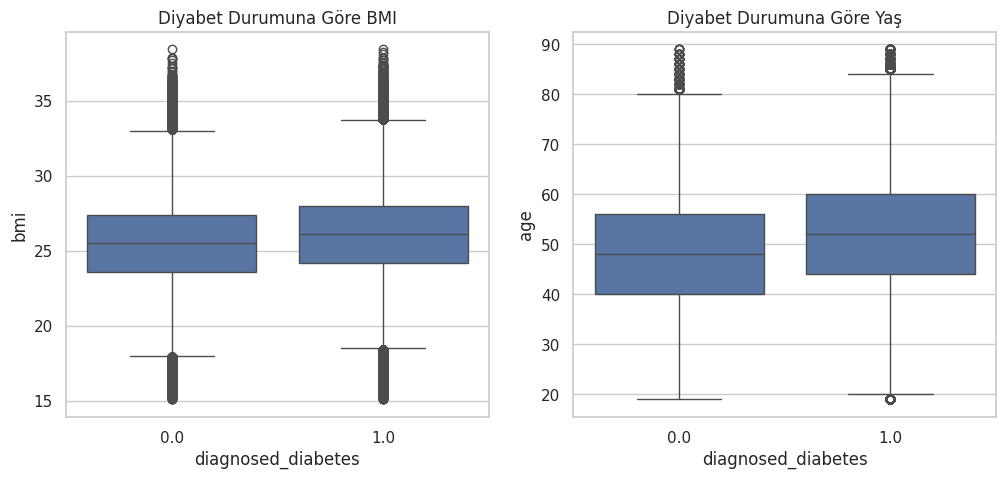

In [13]:
# Yan yana iki grafik oluşturma
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# BMI dağılımı
sns.boxplot(
    x="diagnosed_diabetes",
    y="bmi",
    data=df,
    ax=ax[0]
)
ax[0].set_title("Diyabet Durumuna Göre BMI")

# Yaş dağılımı
sns.boxplot(
    x="diagnosed_diabetes",
    y="age",
    data=df,
    ax=ax[1]
)
ax[1].set_title("Diyabet Durumuna Göre Yaş")

plt.show()

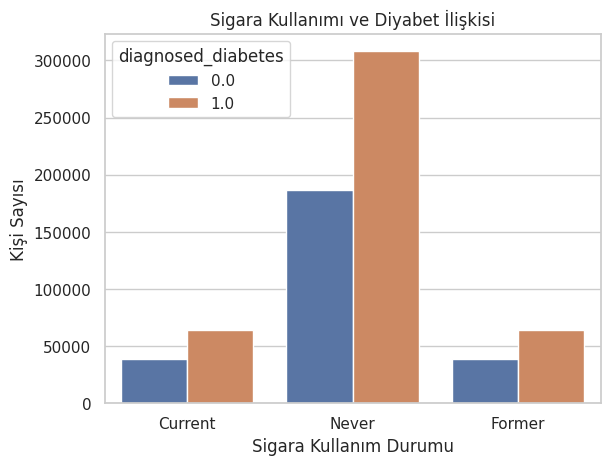

In [14]:
# Sigara kullanım durumuna göre diyabet dağılımı
sns.countplot(
    x="smoking_status",
    hue="diagnosed_diabetes",
    data=df
)

plt.title("Sigara Kullanımı ve Diyabet İlişkisi")
plt.xlabel("Sigara Kullanım Durumu")
plt.ylabel("Kişi Sayısı")

plt.show()

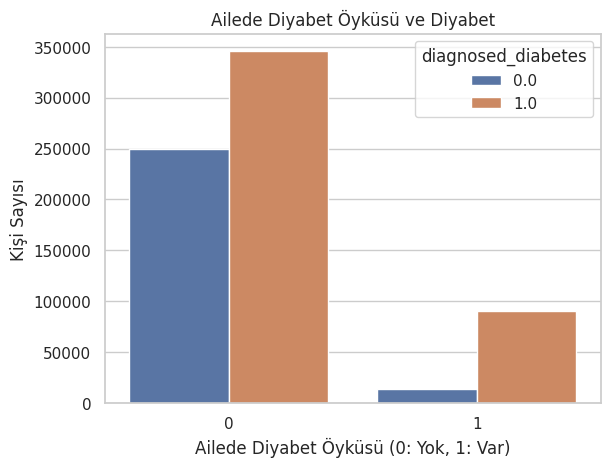

In [15]:
# Ailede diyabet öyküsünün diyabet tanısı ile ilişkisi
sns.countplot(
    x="family_history_diabetes",
    hue="diagnosed_diabetes",
    data=df
)

plt.title("Ailede Diyabet Öyküsü ve Diyabet")
plt.xlabel("Ailede Diyabet Öyküsü (0: Yok, 1: Var)")
plt.ylabel("Kişi Sayısı")

plt.show()

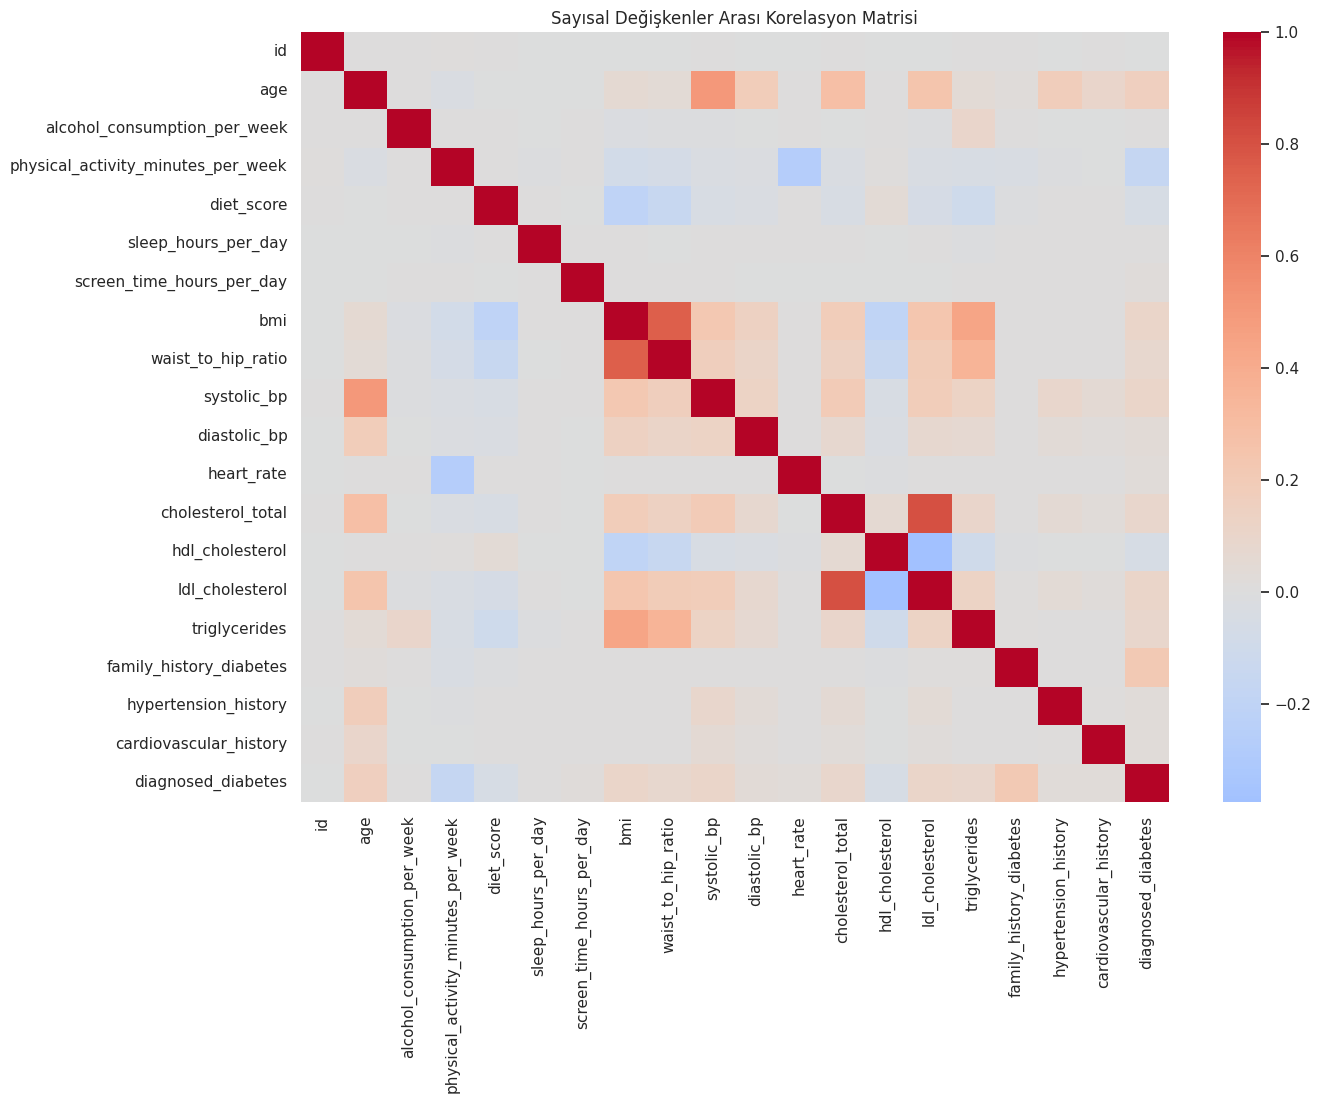

In [16]:
# Sayısal değişkenler arasındaki korelasyonun hesaplanması
corr_matrix = df.select_dtypes(include=["int64", "float64"]).corr()

# Isı haritası ile korelasyonların görselleştirilmesi
plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0
)

plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi")
plt.show()

## *Feature Engineering*

In [17]:
df = df.drop(columns=["id"])
# Gereksiz sütunu çıkar

In [18]:
cat_cols = df.select_dtypes(include="object").columns

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# DL için One-Hot Encoding uygundur.

In [19]:
# Toplam kolesterol oranı
df["cholesterol_ratio"] = df["ldl_cholesterol"] / df["hdl_cholesterol"]

# Aktivite - ekran dengesi
df["activity_screen_ratio"] = (
    df["physical_activity_minutes_per_week"] /
    (df["screen_time_hours_per_day"] + 1)
)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 39 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 700000 non-null  int64  
 1   alcohol_consumption_per_week        700000 non-null  int64  
 2   physical_activity_minutes_per_week  700000 non-null  int64  
 3   diet_score                          700000 non-null  float64
 4   sleep_hours_per_day                 700000 non-null  float64
 5   screen_time_hours_per_day           700000 non-null  float64
 6   bmi                                 700000 non-null  float64
 7   waist_to_hip_ratio                  700000 non-null  float64
 8   systolic_bp                         700000 non-null  int64  
 9   diastolic_bp                        700000 non-null  int64  
 10  heart_rate                          700000 non-null  int64  
 11  cholesterol_total         

## *Target – Feature*

In [21]:
x = df.drop("diagnosed_diabetes", axis=1)
y = df["diagnosed_diabetes"]

In [22]:
df.head()
# Veri kümesinin ilk 5 satırını yeniden gösterir

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,smoking_status_Former,smoking_status_Never,employment_status_Retired,employment_status_Student,employment_status_Unemployed,cholesterol_ratio,activity_screen_ratio
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,True,False,False,False,False,False,False,False,1.965517,6.338028
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,False,False,True,False,True,False,False,False,2.420000,10.735294
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,True,False,False,False,True,True,False,False,1.932203,15.643564
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,True,False,False,False,False,False,False,False,1.574074,7.549020
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,False,False,True,False,True,True,False,False,2.673469,9.016393


## *StandardScaler*

In [23]:
scaler = StandardScaler()
# StandardScaler nesnesi oluşturulur (ortalama=0, std=1 olacak şekilde ölçeklendirme yapar)

x = scaler.fit_transform(x)
# X verisi önce "fit" edilip (ortalama ve std hesaplanır)
# ardından "transform" edilip ölçeklendirilir
# Modelin daha hızlı ve stabil öğrenmesini sağlar

## *Train / Test Distinction*

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.20,      # Verinin %20’si test için ayrılır
    random_state=42,     # Tekrar çalıştırıldığında aynı bölünmeyi sağlar (sabitlik)
    stratify=y           # sınıf dağılımını korur
)
# train_test_split: veriyi eğitim ve test seti olarak ikiye ayırır

## *Neural Network Model (ANN)*

In [26]:
model = Sequential()
# Boş bir yapay sinir ağı (ANN) modeli oluşturur

model.add(Dense(80, activation='relu'))
# İlk gizli katman: 80 nöron (tamamen varsayımsal, hiçbir dayanak yok, hayal ürünü), aktivasyon: ReLU

model.add(Dense(120, activation='relu'))
# İkinci gizli katman: 120 nöron, öğrenme kapasitesini artırır

model.add(Dense(80, activation='relu'))
# Üçüncü gizli katman: tekrar 80 nöron

model.add(Dense(30, activation='relu'))
# Dördüncü gizli katman: 30 nöron (boyut küçülüyor, derinlikten yüzeye iniyoruz)

model.add(Dense(1, activation='sigmoid'))
# Çıkış katmanı: 1 nöron (binary classification için zorunlu)
# Sigmoid: 0 ile 1 arasında olasılık üretir (diyabet var/yok)

# Dense: tüm nöronlar bir önceki katmandaki tüm nöronlara bağlanır (fully connected)
# Bir katmanın çıktısı bir sonraki katmanın girdisi olur

## *Model Compilation*

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
# loss = binary_crossentropy: iki sınıflı problemler için uygun
# optimizer = adam: en sık kullanılan optimizasyon algoritması
# metrics = accuracy: doğruluk ölçüsü hesaplanır

## *EarlyStopping*

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',  # İzlenen metrik: doğrulama kaybı (validation loss)
    patience=10,          # 10 epoch boyunca iyileşme olmazsa eğitim durur
    restore_best_weights=True
)
# EarlyStopping overfitting'i önler ve gereksiz uzun eğitim süresini kısaltır

## *Model Training*

In [30]:
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=100,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/100
17500/17500 - 48s - 3ms/step - AUC: 0.6907 - loss: 0.6058 - val_AUC: 0.6943 - val_loss: 0.6034
Epoch 2/100
17500/17500 - 46s - 3ms/step - AUC: 0.6943 - loss: 0.6034 - val_AUC: 0.6947 - val_loss: 0.6033
Epoch 3/100
17500/17500 - 45s - 3ms/step - AUC: 0.6953 - loss: 0.6027 - val_AUC: 0.6953 - val_loss: 0.6026
Epoch 4/100
17500/17500 - 47s - 3ms/step - AUC: 0.6960 - loss: 0.6021 - val_AUC: 0.6949 - val_loss: 0.6032
Epoch 5/100
17500/17500 - 46s - 3ms/step - AUC: 0.6964 - loss: 0.6018 - val_AUC: 0.6951 - val_loss: 0.6036
Epoch 6/100
17500/17500 - 46s - 3ms/step - AUC: 0.6970 - loss: 0.6014 - val_AUC: 0.6950 - val_loss: 0.6028
Epoch 7/100
17500/17500 - 45s - 3ms/step - AUC: 0.6975 - loss: 0.6011 - val_AUC: 0.6945 - val_loss: 0.6034
Epoch 8/100
17500/17500 - 45s - 3ms/step - AUC: 0.6978 - loss: 0.6008 - val_AUC: 0.6947 - val_loss: 0.6032
Epoch 9/100
17500/17500 - 45s - 3ms/step - AUC: 0.6982 - loss: 0.6006 - val_AUC: 0.6941 - val_loss: 0.6058
Epoch 10/100
17500/17500 - 46s - 3ms/

## *Model Evaluation*

In [31]:
loss, auc = model.evaluate(x_test, y_test)
print(f"Validation AUC: {auc:.4f}")

4375/4375 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - AUC: 0.6961 - loss: 0.6023
Validation AUC: 0.6953


## *Education Chart*

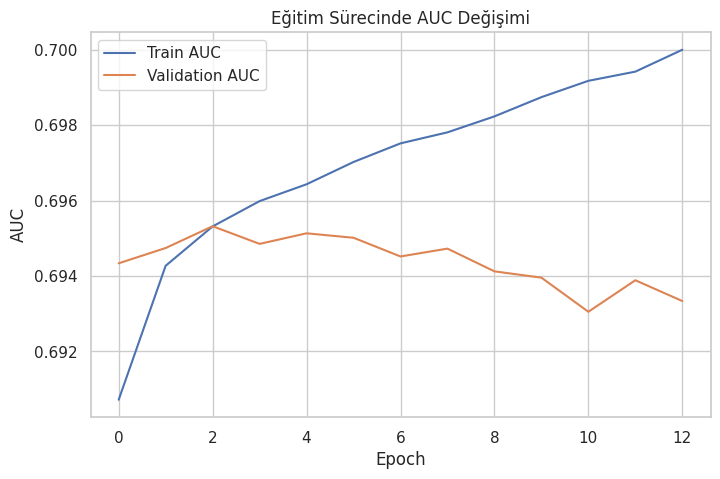

In [33]:
# Eğitim ve doğrulama AUC'si
plt.figure(figsize=(8,5))
plt.plot(history.history['AUC'], label='Train AUC')
plt.plot(history.history['val_AUC'], label='Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.title('Eğitim Sürecinde AUC Değişimi')
plt.legend()
plt.show()

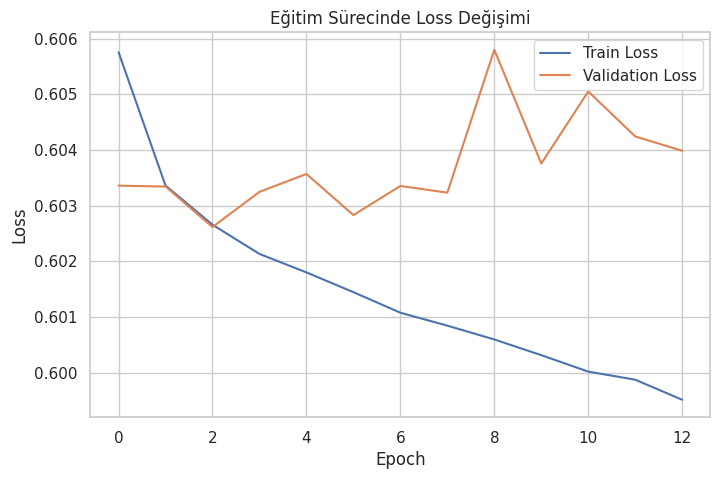

In [34]:
# Eğitim ve doğrulama loss'u
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Eğitim Sürecinde Loss Değişimi')
plt.legend()
plt.show()

## *Save Model*

In [37]:
model.save("model.keras")
# model.keras: Keras modelinizi kaydeder, daha sonra load_model ile açabilirsiniz

## *Save Scaler*

In [38]:
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
# scaler.pkl: Standartlaştırıcıyı kaydeder, streamlit uygulamasında aynı scaling kullanılabilir

## *Diabetes Prediction Project – Deep Learning Results*

### 🔹 Model Eğitimi ve Performans
- Eğitim sırasında 4375 adım tamamlandı.
- Modelin son epoch sonuçları:
  - **AUC:** 0.6961
  - **Loss:** 0.6023
- Validation set üzerindeki performans:
  - **Validation AUC:** 0.6953

Bu sonuç, modelin diyabet tahmininde %69 civarında ayrım gücüne sahip olduğunu gösteriyor.